In [46]:
# Importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [47]:
# Loading the dataset
# Keep the dataset in the same location as the notebook file. 
# If not, then specify the correct address whille loading the file.
df1 = pd.read_csv("sales-data.csv", header=None, names=["Month","Sales"])
df1.head()

,Month,Sales
0,1980-01,154
1,1980-02,96
2,1980-03,73
3,1980-04,49
4,1980-05,36


In [48]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Month   77 non-null     object
 1   Sales   77 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.3+ KB


In [49]:
df1.tail()

,Month,Sales
72,1986-01,628
73,1986-02,308
74,1986-03,324
75,1986-04,248
76,1986-05,272


In [50]:
df1["Month"]=pd.to_datetime(df1["Month"], format="%Y-%m")
df1.head()

,Month,Sales
0,1980-01-01,154
1,1980-02-01,96
2,1980-03-01,73
3,1980-04-01,49
4,1980-05-01,36


In [51]:
df1 = df1.set_index("Month")
df1.head()

,Sales
Month,
1980-01-01,154
1980-02-01,96
1980-03-01,73
1980-04-01,49
1980-05-01,36


<Figure size 960x480 with 0 Axes>

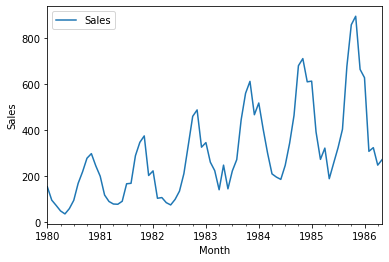

In [52]:
#Plotting the series
plt.figure(num=None, figsize=(12, 6), dpi=80, facecolor='w', edgecolor='k')
df1.plot()
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()

We can see that the dataset has a clear trend.

This suggests that the time series is not stationary and will require differencing to make it stationary, at least a difference order of 1.

## Making it stationary

In [53]:
from scipy.stats import boxcox
df1_boxcox=pd.Series(boxcox(df1["Sales"], lmbda=0), index=df1.index)

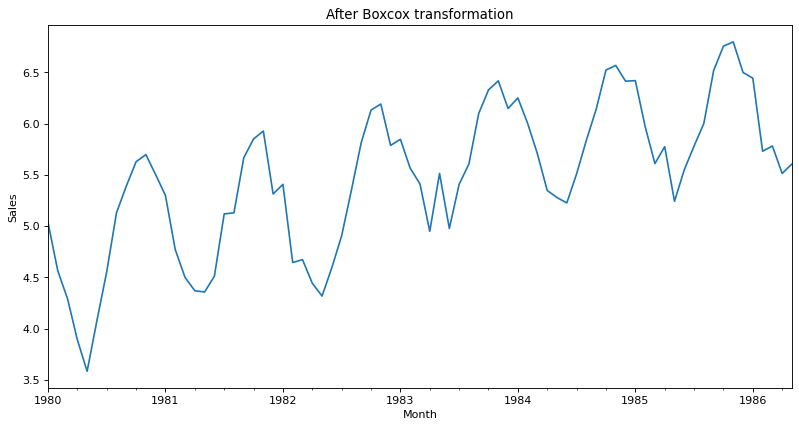

In [54]:
#Plotting the series
plt.figure(num=None, figsize=(12, 6), dpi=80, facecolor='w', edgecolor='k')
df1_boxcox.plot()
plt.title("After Boxcox transformation")
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()

In [55]:
len(df1_boxcox)

77

In [56]:
df1_boxcox_diff=pd.Series(df1_boxcox-df1_boxcox.shift(), index=df1_boxcox.index)
df1_boxcox_diff.dropna(inplace=True)

In [57]:
len(df1_boxcox_diff)

76

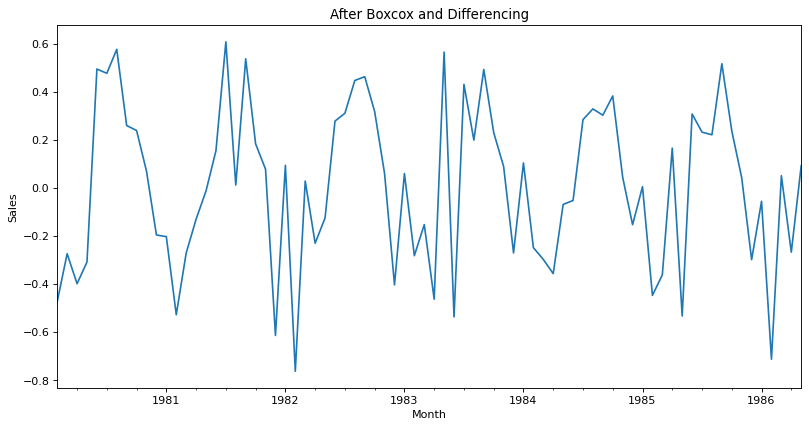

In [58]:
#Plotting the series
plt.figure(num=None, figsize=(12, 6), dpi=80, facecolor='w', edgecolor='k')
df1_boxcox_diff.plot()
plt.title("After Boxcox and Differencing")
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()

In [59]:
df1_boxcox_diff.head()

Month
1980-02-01   -0.472604
1980-03-01   -0.273889
1980-04-01   -0.398639
1980-05-01   -0.308301
1980-06-01    0.494019
dtype: float64

## Check for Stationarity

In [60]:
from statsmodels.tsa.stattools import kpss
kpsstest=kpss(df1_boxcox_diff)
print("KPSS statistic %f " %kpsstest[0])

KPSS statistic 0.225247 


C:\Users\LENOVO\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1875: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
C:\Users\LENOVO\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1910: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


In [61]:
kpsstest

(0.22524710869484132,
 0.1,
 12,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

### The series is now stationary

Let’s also take a quick look at an autocorrelation plot of the time series. This is also built-in to Pandas. The example below plots the autocorrelation for a large number of lags in the time series.

C:\Users\LENOVO\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


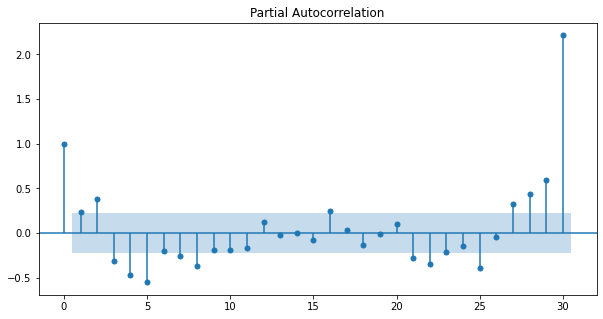

In [62]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plt.figure(figsize=(10,5))
plot_pacf(df1_boxcox_diff, ax=plt.gca(), lags=30)
plt.show()

In [63]:
train_len=60
tr=df1[:train_len]
te=df1[train_len:]

In [64]:
te.index.min()

Timestamp('1985-01-01 00:00:00')

### Build Autoregressive model

In [65]:
train=df1_boxcox_diff[:59]
test=df1_boxcox_diff[59:]

In [66]:
from statsmodels.tsa.arima_model import ARIMA

# fit model
m1 = ARIMA(train, order=(8,0,0))
model_fit = m1.fit()
print(model_fit.summary())

C:\Users\LENOVO\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\LENOVO\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS 

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                   59
Model:                     ARMA(8, 0)   Log Likelihood                  14.465
Method:                       css-mle   S.D. of innovations              0.180
Date:                Mon, 31 Jan 2022   AIC                             -8.931
Time:                        17:05:28   BIC                             11.845
Sample:                    02-01-1980   HQIC                            -0.821
                         - 12-01-1984                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0211      0.008      2.686      0.007       0.006       0.037
ar.L1.y       -0.4310      0.123     -3.510      0.000      -0.672      -0.190
ar.L2.y        0.0271      0.119      0.227      0.8

In [67]:
y_hat_ar=df1_boxcox_diff.copy()
len(y_hat_ar)

76

In [68]:
y_hat_ar.head()

Month
1980-02-01   -0.472604
1980-03-01   -0.273889
1980-04-01   -0.398639
1980-05-01   -0.308301
1980-06-01    0.494019
dtype: float64

In [69]:
df1_boxcox_diff.head()

Month
1980-02-01   -0.472604
1980-03-01   -0.273889
1980-04-01   -0.398639
1980-05-01   -0.308301
1980-06-01    0.494019
dtype: float64

In [70]:
df1_boxcox_diff.index.min()

Timestamp('1980-02-01 00:00:00')

In [71]:
df1_boxcox_diff.index.max()

Timestamp('1986-05-01 00:00:00')

In [72]:
y_hat_ar["ar_forecast_boxcox_diff"]=model_fit.predict(df1_boxcox_diff.index.min(), df1_boxcox_diff.index.max())

C:\Users\LENOVO\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


In [73]:
len(y_hat_ar["ar_forecast_boxcox_diff"])

76

In [74]:
y_hat_ar["ar_forecast_boxcox_diff"].head()

1980-02-01    0.021119
1980-03-01   -0.158861
1980-04-01   -0.217475
1980-05-01   -0.063663
1980-06-01   -0.038045
Freq: MS, dtype: float64

In [75]:
y_hat_ar["ar_forecast_boxcox"]= y_hat_ar["ar_forecast_boxcox_diff"].cumsum()

In [76]:
len(y_hat_ar["ar_forecast_boxcox"])

76

In [77]:
y_hat_ar["ar_forecast_boxcox"].head()

1980-02-01    0.021119
1980-03-01   -0.137743
1980-04-01   -0.355218
1980-05-01   -0.418880
1980-06-01   -0.456925
Freq: MS, dtype: float64

In [78]:
y_hat_ar["ar_forecast_boxcox"].shape

(76,)

In [79]:
y_hat_ar['ar_forecast_boxcox'] = y_hat_ar['ar_forecast_boxcox'].add(df1_boxcox[0])

In [80]:
df1_boxcox.shape

(77,)

In [81]:
y_hat_ar["ar_forecast_boxcox"].head()

1980-02-01    5.058072
1980-03-01    4.899210
1980-04-01    4.681735
1980-05-01    4.618072
1980-06-01    4.580028
Freq: MS, dtype: float64

In [82]:
y_hat_ar["ar_forecast"]= np.exp(y_hat_ar["ar_forecast_boxcox"])

In [83]:
y_hat_ar["ar_forecast"].head()

1980-02-01    157.286896
1980-03-01    134.183740
1980-04-01    107.957224
1980-05-01    101.298586
1980-06-01     97.517091
Freq: MS, dtype: float64

In [84]:
y_hat_ar["ar_forecast"].tail()

1986-01-01    908.031827
1986-02-01    689.291560
1986-03-01    529.072789
1986-04-01    444.194781
1986-05-01    419.422685
Freq: MS, dtype: float64

In [85]:
df1_boxcox.head()

Month
1980-01-01    5.036953
1980-02-01    4.564348
1980-03-01    4.290459
1980-04-01    3.891820
1980-05-01    3.583519
dtype: float64

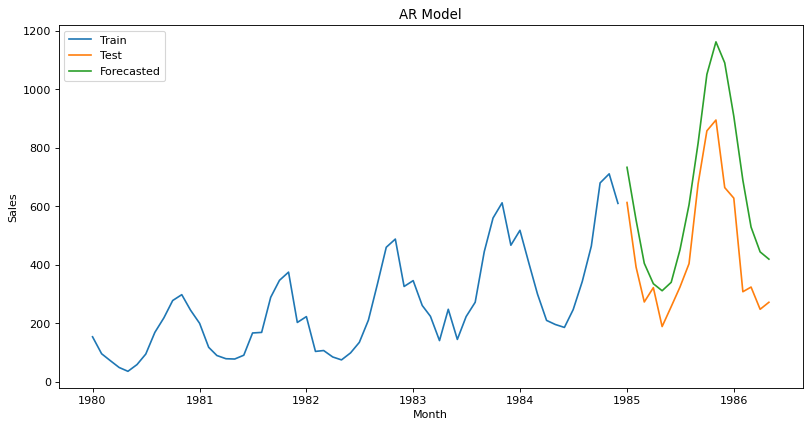

In [86]:
#Plotting the series
plt.figure(num=None, figsize=(12, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(df1[:60], label="Train")
plt.plot(df1[60:], label="Test")
plt.plot(y_hat_ar['ar_forecast'][te.index.min():], label="Forecasted")
plt.title("AR Model")
plt.legend()
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()

In [87]:
from sklearn.metrics import mean_squared_error

In [88]:
rmse_ar = round(np.sqrt(mean_squared_error(te, y_hat_ar['ar_forecast'][te.index.min():])), 2)
rmse_ar

213.17

In [89]:
mape_ar = round(np.mean(np.abs(te['Sales'] - y_hat_ar['ar_forecast'][te.index.min():])  / te['Sales'] * 100), 2)
mape_ar

47.15

In [90]:
results = pd.DataFrame({'Method':['Auto Regressive method'], 'MAPE': [mape_ar], 'RMSE': [rmse_ar]})
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Auto Regressive method,213.17,47.15


### Build Moving Average Model

#### Let’s also take a quick look at an autocorrelation plot of the time series. This is also built-in to Pandas. The example below plots the autocorrelation for a large number of lags in the time series.

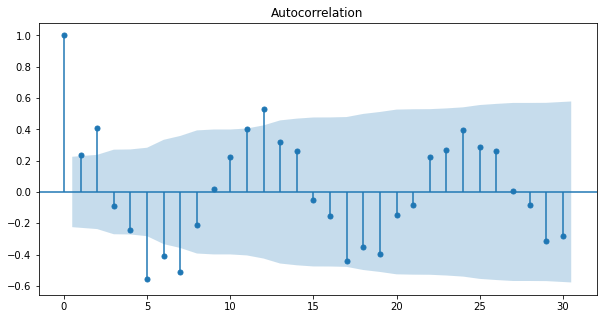

In [91]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plt.figure(figsize=(10,5))
plot_acf(df1_boxcox_diff, ax=plt.gca(), lags=30)
plt.show()

In [92]:
from statsmodels.tsa.arima_model import ARIMA

# fit model
m2 = ARIMA(train, order=(0,0,3))
model_fit = m2.fit()
print(model_fit.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                   59
Model:                     ARMA(0, 3)   Log Likelihood                 -10.011
Method:                       css-mle   S.D. of innovations              0.285
Date:                Mon, 31 Jan 2022   AIC                             30.021
Time:                        17:05:29   BIC                             40.409
Sample:                    02-01-1980   HQIC                            34.076
                         - 12-01-1984                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0157      0.068      0.230      0.818      -0.118       0.149
ma.L1.y        0.1615      0.129      1.254      0.210      -0.091       0.414
ma.L2.y        0.5341      0.094      5.659      0.0

C:\Users\LENOVO\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\LENOVO\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS 

In [93]:
y_hat_ma = df1_boxcox_diff.copy()
len(y_hat_ma)

76

In [94]:
y_hat_ma["ma_forecast_boxcox_diff"]=model_fit.predict(df1_boxcox_diff.index.min(), df1_boxcox_diff.index.max())
y_hat_ma["ma_forecast_boxcox"]= y_hat_ma["ma_forecast_boxcox_diff"].cumsum()
y_hat_ma['ma_forecast_boxcox'] = y_hat_ma['ma_forecast_boxcox'].add(df1_boxcox[0])

C:\Users\LENOVO\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


In [95]:
y_hat_ma['ma_forecast_boxcox'].head()

1980-02-01    5.052617
1980-03-01    4.944459
1980-04-01    4.729424
1980-05-01    4.581914
1980-06-01    4.456970
Freq: MS, dtype: float64

In [96]:
y_hat_ma["ma_forecast"]= np.exp(y_hat_ma["ma_forecast_boxcox"])

In [97]:
y_hat_ma['ma_forecast'].head()

1980-02-01    156.431355
1980-03-01    140.394835
1980-04-01    113.230369
1980-05-01     97.701253
1980-06-01     86.225813
Freq: MS, dtype: float64

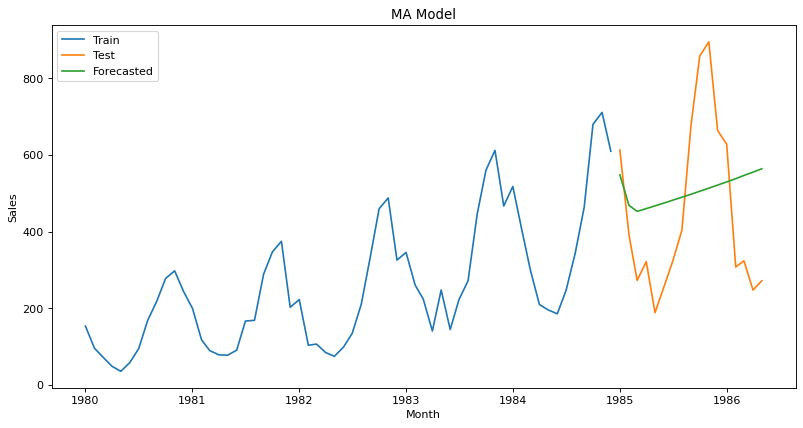

In [98]:
#Plotting the series
plt.figure(num=None, figsize=(12, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(df1[:60], label="Train")
plt.plot(df1[60:], label="Test")
plt.plot(y_hat_ma['ma_forecast'][te.index.min():], label="Forecasted")
plt.title("MA Model")
plt.legend()
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()

In [99]:
from sklearn.metrics import mean_squared_error

In [100]:
rmse_ma = round(np.sqrt(mean_squared_error(te['Sales'], y_hat_ma['ma_forecast'][te.index.min():])), 2)
rmse_ma

221.38

In [101]:
mape_ma = round(np.mean(np.abs(te['Sales'] - y_hat_ma['ma_forecast'][te.index.min():])  / te['Sales'] * 100), 2)
mape_ma

56.66

In [102]:
tempResults = pd.DataFrame({'Method':['Moving average method'], 'RMSE': [rmse_ma],'MAPE': [mape_ma] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Auto Regressive method,213.17,47.15
0,Moving average method,221.38,56.66


## Build the ARMA model arma(4,3)

In [103]:
from statsmodels.tsa.arima_model import ARIMA

# fit model
m3 = ARIMA(train, order=(4,0,3))
model_fit = m3.fit()
print(model_fit.summary())

C:\Users\LENOVO\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\LENOVO\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS 

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                   59
Model:                     ARMA(4, 3)   Log Likelihood                  15.282
Method:                       css-mle   S.D. of innovations              0.170
Date:                Mon, 31 Jan 2022   AIC                            -12.563
Time:                        17:05:31   BIC                              6.135
Sample:                    02-01-1980   HQIC                            -5.264
                         - 12-01-1984                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0192      0.012      1.643      0.100      -0.004       0.042
ar.L1.y        0.2557      0.029      8.855      0.000       0.199       0.312
ar.L2.y        1.0938        nan        nan        n

C:\Users\LENOVO\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\LENOVO\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:1521: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(-inv(hess)))


In [104]:
y_hat_arma = df1_boxcox_diff.copy()
y_hat_arma["arma_forecast_boxcox_diff"]=model_fit.predict(df1_boxcox_diff.index.min(), df1_boxcox_diff.index.max())
y_hat_arma["arma_forecast_boxcox"]= y_hat_arma["arma_forecast_boxcox_diff"].cumsum()

C:\Users\LENOVO\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


In [105]:
y_hat_arma["arma_forecast_boxcox"] = y_hat_arma["arma_forecast_boxcox"].add(df1_boxcox[0])
y_hat_arma["arma_forecast"]= np.exp(y_hat_arma["arma_forecast_boxcox"])

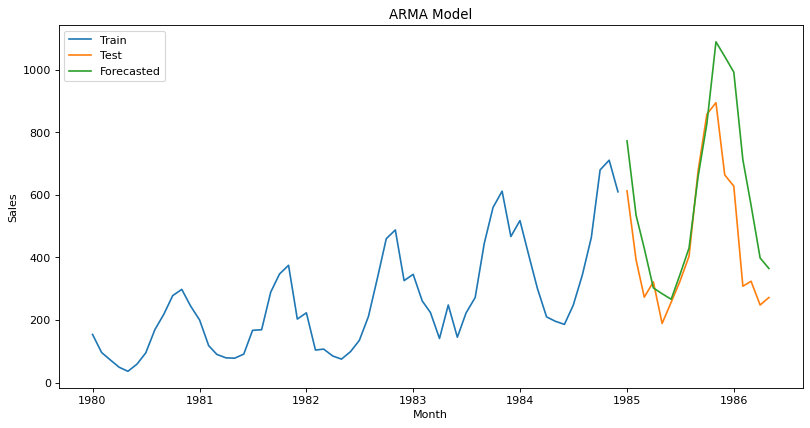

In [106]:
#Plotting the series
plt.figure(num=None, figsize=(12, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(df1[:60], label="Train")
plt.plot(df1[60:], label="Test")
plt.plot(y_hat_arma['arma_forecast'][te.index.min():], label="Forecasted")
plt.title("ARMA Model")
plt.legend()
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()

In [107]:
from sklearn.metrics import mean_squared_error

rmse_arma = round(np.sqrt(mean_squared_error(te['Sales'], y_hat_arma['arma_forecast'][te.index.min():])), 2)
rmse_arma

195.6

In [108]:
mape_arma = round(np.mean(np.abs(te['Sales'] - y_hat_arma['arma_forecast'][te.index.min():])/te['Sales'] * 100), 2)
mape_arma

37.46

In [109]:
tempResults = pd.DataFrame({'Method':['ARMA method'], 'RMSE': [rmse_arma],'MAPE': [mape_arma] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Auto Regressive method,213.17,47.15
0,Moving average method,221.38,56.66
0,ARMA method,195.60,37.46


In [110]:
train_boxcox=df1_boxcox[:60]
test_boxcox=df1_boxcox[60:]

## Build the ARIMA model arma(4,1,3)

In [111]:
from statsmodels.tsa.arima_model import ARIMA

# fit model
m4 = ARIMA(train_boxcox, order=(4,1,3))
model_fit = m4.fit()
print(model_fit.summary())

C:\Users\LENOVO\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\LENOVO\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS 

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                   59
Model:                 ARIMA(4, 1, 3)   Log Likelihood                  15.282
Method:                       css-mle   S.D. of innovations              0.170
Date:                Mon, 31 Jan 2022   AIC                            -12.563
Time:                        17:05:33   BIC                              6.135
Sample:                    02-01-1980   HQIC                            -5.264
                         - 12-01-1984                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0192      0.012      1.643      0.100      -0.004       0.042
ar.L1.D.y      0.2557      0.029      8.855      0.000       0.199       0.312
ar.L2.D.y      1.0938        nan        nan        n

C:\Users\LENOVO\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\LENOVO\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:1521: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(-inv(hess)))


In [112]:
y_hat_arima = df1_boxcox_diff.copy()
y_hat_arima["arima_forecast_boxcox_diff"]=model_fit.predict(df1_boxcox_diff.index.min(), df1_boxcox_diff.index.max())
y_hat_arima["arima_forecast_boxcox"]= y_hat_arima["arima_forecast_boxcox_diff"].cumsum()

C:\Users\LENOVO\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


In [113]:
y_hat_arima["arima_forecast_boxcox"] = y_hat_arima["arima_forecast_boxcox"].add(df1_boxcox[0])
y_hat_arima["arima_forecast"]= np.exp(y_hat_arima["arima_forecast_boxcox"])

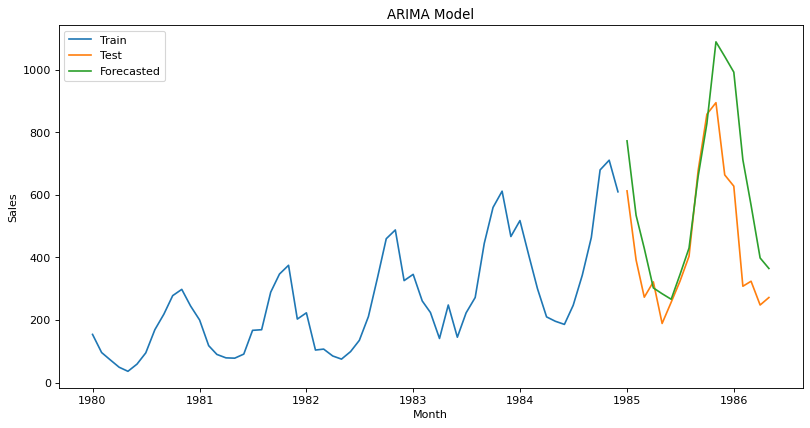

In [114]:
#Plotting the series
plt.figure(num=None, figsize=(12, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(df1[:60], label="Train")
plt.plot(df1[60:], label="Test")
plt.plot(y_hat_arima['arima_forecast'][te.index.min():], label="Forecasted")
plt.title("ARIMA Model")
plt.legend()
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()

In [115]:
from sklearn.metrics import mean_squared_error

rmse_arima = round(np.sqrt(mean_squared_error(te['Sales'], y_hat_arima['arima_forecast'][te.index.min():])), 2)
rmse_arima

195.6

In [116]:
mape_arima = round(np.mean(np.abs(te['Sales'] - y_hat_arima['arima_forecast'][te.index.min():])/te['Sales'] * 100), 2)
mape_arima

37.46

In [117]:
tempResults = pd.DataFrame({'Method':['ARIMA method'], 'RMSE': [rmse_arima],'MAPE': [mape_arima] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Auto Regressive method,213.17,47.15
0,Moving average method,221.38,56.66
0,ARMA method,195.60,37.46
0,ARIMA method,195.60,37.46


### Build the SARIMA model SARIMA(7, 2, 9)(3, 1, 1,12) 

In [118]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# fit model
m5 = SARIMAX(train_boxcox, order=(7,2,9), seasonal_order=(3,1,1,12))
model_fit = m5.fit()
print(model_fit.summary())

C:\Users\LENOVO\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\LENOVO\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\LENOVO\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\LENOVO\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\LENOVO\anaconda3\lib\site-packages\statsmodels\tsa\statespac

                                      SARIMAX Results                                       
Dep. Variable:                                    y   No. Observations:                   60
Model:             SARIMAX(7, 2, 9)x(3, 1, [1], 12)   Log Likelihood                   9.780
Date:                              Mon, 31 Jan 2022   AIC                             22.439
Time:                                      17:05:39   BIC                             60.841
Sample:                                  01-01-1980   HQIC                            36.825
                                       - 12-01-1984                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.2179      1.441     -0.845      0.398      -4.043       1.607
ar.L2         -0.69

In [119]:
y_hat_sarima = df1_boxcox_diff.copy()
y_hat_sarima["sarima_forecast_boxcox"]=model_fit.predict(df1_boxcox_diff.index.min(), df1_boxcox_diff.index.max())
y_hat_sarima["sarima_forecast"]= np.exp(y_hat_sarima["sarima_forecast_boxcox"])

C:\Users\LENOVO\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


In [120]:
df1_boxcox_diff.index.min()

Timestamp('1980-02-01 00:00:00')

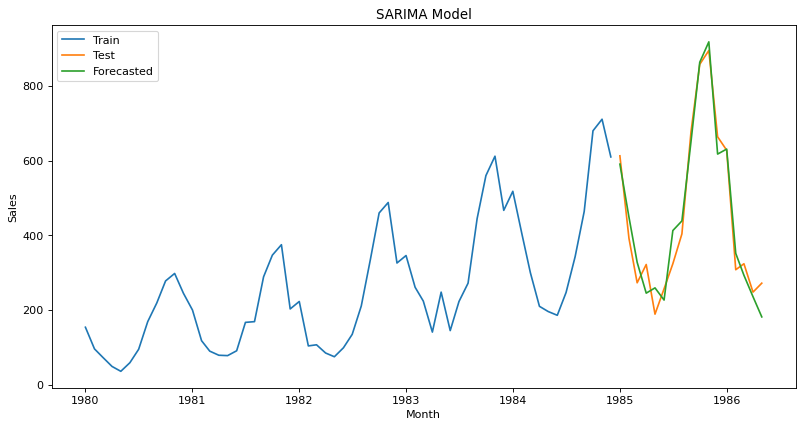

In [121]:
#Plotting the series
plt.figure(num=None, figsize=(12, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(tr, label="Train")
plt.plot(te, label="Test")
plt.plot(y_hat_sarima['sarima_forecast'][te.index.min():], label="Forecasted")
plt.title("SARIMA Model")
plt.legend()
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()

In [122]:
from sklearn.metrics import mean_squared_error

rmse_sarima = round(np.sqrt(mean_squared_error(te, y_hat_sarima['sarima_forecast'][te.index.min():])), 2)
rmse_sarima

49.81

In [123]:
mape_sarima = round(np.mean(np.abs(te['Sales'] - y_hat_sarima['sarima_forecast'][te.index.min():])  / te['Sales'] * 100), 2)
mape_sarima

13.15

In [124]:
tempResults = pd.DataFrame({'Method':['SARIMA method'], 'RMSE': [rmse_sarima],'MAPE': [mape_sarima] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Auto Regressive method,213.17,47.15
0,Moving average method,221.38,56.66
0,ARMA method,195.60,37.46
0,ARIMA method,195.60,37.46
0,SARIMA method,49.81,13.15
